In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt


read the csv after finding horizontal threshold, vertical thresholds. make it such that it follows the given format

final csv is the csv that has columns Id, Top-Left, Bottom-Right, Top, Left, Bottom, Right, Top_box, Bottom_box, Left_box, Right_box

Id - refers to box ID -> int

Top-Left,Bottom-Right - refers to the xy coordinates of topleft and bottomright coordinate of a bounding box

Top/Left/Bottom/Right - refers to the coordinates of edge centers

Top_box/Bottom_box/Left_box/Right_box - refers to the nearest box from current box such that the words across paragraphs or columns should not get connected -> List:[dist, nearest box ID]


In [2]:
df = pd.read_csv("CSV/TLBR_68.csv")

In [3]:
img = cv2.imread('images/68.jpg')

Given below are two functions to visualize the document image and the connections established.

visualize_bboxes() can be used to visualize a document image with the bounding boxes around words. Bounding box information is given in the CSVs provided

make_connections() can be used to verify and visualize the connections established between words such that it satisfies the given criteria of grouping words in a logical paragraph. This function has to be used after getting the final csv in the specified format

(290, 85)
(563, 82)
(744, 92)
(1163, 92)
(1218, 79)
(1385, 92)
(1646, 79)
(1834, 79)
(1907, 82)
(2127, 89)
(406, 208)
(508, 212)
(305, 287)
(384, 287)
(573, 294)
(696, 294)
(844, 304)
(305, 369)
(462, 373)
(650, 373)
(718, 376)
(788, 383)
(853, 379)
(1100, 373)
(305, 455)
(433, 458)
(648, 458)
(732, 458)
(851, 461)
(957, 468)
(1042, 461)
(1143, 461)
(312, 537)
(481, 537)
(660, 540)
(851, 537)
(981, 543)
(1134, 540)
(1032, 308)
(1107, 297)
(1385, 304)
(1477, 291)
(1535, 291)
(1593, 291)
(1723, 304)
(1781, 291)
(1917, 291)
(2025, 304)
(2115, 291)
(2224, 291)
(1385, 369)
(1564, 373)
(1680, 373)
(1796, 373)
(1912, 376)
(2001, 390)
(2185, 376)
(2253, 390)
(1387, 537)
(1453, 537)
(1542, 533)
(1590, 540)
(1677, 540)
(1755, 537)
(1880, 533)
(1984, 547)
(2064, 533)
(1385, 608)
(1499, 612)
(1624, 619)
(1779, 615)
(1888, 622)
(1977, 615)
(2064, 619)
(2209, 605)
(1397, 697)
(1559, 714)
(1735, 697)
(1796, 694)
(1885, 694)
(1387, 455)
(1465, 468)
(1578, 472)
(1668, 458)
(1801, 455)
(1948, 472)
(2110

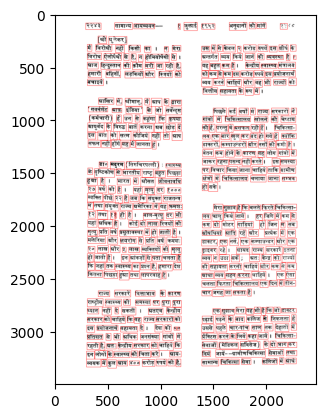

In [9]:
def visualize_bboxes(img):
  img_2 = img.copy()
  for index, rows in df.iterrows():
    top_left = (int(rows['Top-Left'].split(',')[0][1:]),int(rows['Top-Left'].split(',')[1][:-1]))
    bottom_right = (int(rows['Bottom-Right'].split(',')[0][1:]),int(rows['Bottom-Right'].split(',')[1][:-1]))
    print(top_left)
    cv2.rectangle(img_2, top_left, bottom_right, (255, 0, 0), 2)

    plt.imshow(img_2)
  
visualize_bboxes(img)

In [5]:
def make_connections(image,euclidean):

  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image_with_boxes = image_rgb.copy()

  for index, row in euclidean.iterrows():
      left = int(row['Left edge center'][0])
      right = int(row['Right edge center'][0])
      top = int(row['Top edge center'][1])
      bottom = int(row['Bottom edge center'][1])
      box_id = int(row['Id'])

      width = right - left
      height = bottom - top

      top_left = (left, top)
      bottom_right = (right, bottom)

      cv2.rectangle(image_with_boxes, top_left, bottom_right, (255, 0, 0), 2)

      label_position = (left, top - 10)
      cv2.putText(image_with_boxes, str(box_id), label_position, cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

      top_adjacent_id = int(row['Top box'][1])
      bottom_adjacent_id = int(row['Bottom box'][1])
      left_adjacent_id = int(row['Left box'][1])
      right_adjacent_id = int(row['Right box'][1])

      if top_adjacent_id != 0:
          top_adjacent_row = euclidean[euclidean['Id'] == top_adjacent_id].iloc[0]
          top_adjacent_center = int(top_adjacent_row['Bottom edge center'][0]) , int(top_adjacent_row['Bottom edge center'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(top)), top_adjacent_center, (0, 255, 0), 2)

      if bottom_adjacent_id != 0:
          bottom_adjacent_row = euclidean[euclidean['Id'] == bottom_adjacent_id].iloc[0]
          bottom_adjacent_center = int(bottom_adjacent_row['Top edge center'][0]) , int(bottom_adjacent_row['Top edge center'][1])
          cv2.line(image_with_boxes, (int(left) + width // 2, int(bottom)), (int(bottom_adjacent_center[0]), int(bottom_adjacent_center[1])), (0, 255, 0), 2)

      if left_adjacent_id != 0:
          left_adjacent_row = euclidean[euclidean['Id'] == left_adjacent_id].iloc[0]
          left_adjacent_center = int(left_adjacent_row['Right edge center'][0]) , int(left_adjacent_row['Right edge center'][1])
          cv2.line(image_with_boxes, (int(left), int(top) + height // 2), (int(left_adjacent_center[0]), int(left_adjacent_center[1])), (0, 255, 0), 2)

      if right_adjacent_id != 0:
          right_adjacent_row = euclidean[euclidean['Id'] == right_adjacent_id].iloc[0]
          right_adjacent_center = int(right_adjacent_row['Left edge center'][0]) , int(right_adjacent_row['Left edge center'][1])
          cv2.line(image_with_boxes, (int(right), int(top) + height // 2), (int(right_adjacent_center[0]), int(right_adjacent_center[1])), (0, 255, 0), 2)

  return image_with_boxes

      Id      Top-Left  Bottom-Right Top edge center Bottom edge center  \
0      0     (290, 85)    (435, 147)     [362.5, 85]       [362.5, 147]   
1      1     (563, 82)    (730, 147)     [646.5, 82]       [646.5, 147]   
2      2     (744, 92)    (940, 140)     [842.0, 92]       [842.0, 140]   
3      3    (1163, 92)   (1184, 147)    [1173.5, 92]      [1173.5, 147]   
4      4    (1218, 79)   (1344, 157)    [1281.0, 79]      [1281.0, 157]   
..   ...           ...           ...             ...                ...   
493  493  (1566, 3264)  (1740, 3315)  [1653.0, 3264]     [1653.0, 3315]   
494  494  (1762, 3261)  (1851, 3315)  [1806.5, 3261]     [1806.5, 3315]   
495  495  (1958, 3261)  (2100, 3312)  [2029.0, 3261]     [2029.0, 3312]   
496  496  (2120, 3250)  (2163, 3315)  [2141.5, 3250]     [2141.5, 3315]   
497  497  (2180, 3254)  (2279, 3309)  [2229.5, 3254]     [2229.5, 3309]   

    Right edge center Left edge center                    Top box  \
0        [435, 116.0]     [290

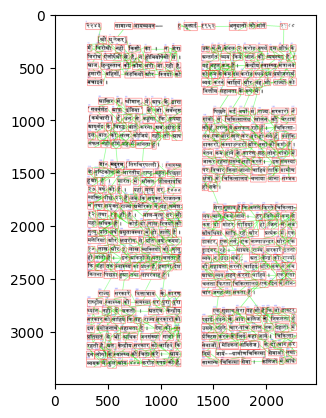

In [8]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score


def euclidean_distance(point1, point2):
    return np.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

horizontal_thresholds = range(100,151,10)
vertical_thresholds = range(100,151,10) 

best_horizontal_threshold = None
best_vertical_threshold = None
best_performance_score = -1
best_results = [] 

for horizontal_threshold in horizontal_thresholds:
    horizontal_threshold=horizontal_threshold
    for vertical_threshold in vertical_thresholds:
        vertical_threshold=vertical_threshold
        results = []
        for index, row in df.iterrows():
            current_id = row['Id']
            top_left = (int(row['Top-Left'].split(',')[0][1:]), int(row['Top-Left'].split(',')[1][:-1]))
            bottom_right = (int(row['Bottom-Right'].split(',')[0][1:]), int(row['Bottom-Right'].split(',')[1][:-1]))

            top_edge_center = [(top_left[0] + bottom_right[0]) / 2, top_left[1]]
            bottom_edge_center = [(top_left[0] + bottom_right[0]) / 2, bottom_right[1]]
            right_edge_center = [bottom_right[0], (top_left[1] + bottom_right[1]) / 2]
            left_edge_center = [top_left[0], (top_left[1] + bottom_right[1]) / 2]

            top_box = [-1, 0]
            bottom_box = [-1, 0]
            right_box = [-1, 0]
            left_box = [-1, 0]

            for _, neighbor_row in df.iterrows():
                neighbor_id = neighbor_row['Id']
                if neighbor_id == current_id:
                    continue
                
                neighbor_top_left = (int(neighbor_row['Top-Left'].split(',')[0][1:]), int(neighbor_row['Top-Left'].split(',')[1][:-1]))
                neighbor_bottom_right = (int(neighbor_row['Bottom-Right'].split(',')[0][1:]), int(neighbor_row['Bottom-Right'].split(',')[1][:-1]))
                neighbor_top_edge_center = [(neighbor_top_left[0] + neighbor_bottom_right[0]) / 2, neighbor_top_left[1]]
                neighbor_bottom_edge_center = [(neighbor_top_left[0] + neighbor_bottom_right[0]) / 2, neighbor_bottom_right[1]]
                neighbor_right_edge_center = [neighbor_bottom_right[0], (neighbor_top_left[1] + neighbor_bottom_right[1]) / 2]
                neighbor_left_edge_center = [neighbor_top_left[0], (neighbor_top_left[1] + neighbor_bottom_right[1]) / 2]
                horizontal_distance = euclidean_distance(top_edge_center, neighbor_bottom_edge_center)
                vertical_distance = euclidean_distance(right_edge_center, neighbor_left_edge_center)

                if horizontal_distance < horizontal_threshold:
                    if neighbor_top_left[1] < top_left[1]:
                        top_box = [horizontal_distance, neighbor_id]
                    else:
                        bottom_box = [horizontal_distance, neighbor_id]

                if vertical_distance < vertical_threshold:
                    if neighbor_top_left[0] < top_left[0]:
                        left_box = [vertical_distance, neighbor_id]
                    else:
                        right_box = [vertical_distance, neighbor_id]

            results.append({
                'Id': current_id,
                'Top-Left': top_left,
                'Bottom-Right': bottom_right,
                'Top edge center': top_edge_center,
                'Bottom edge center': bottom_edge_center,
                'Right edge center': right_edge_center,
                'Left edge center': left_edge_center,
                'Top box': top_box,
                'Bottom box': bottom_box,
                'Right box': right_box,
                'Left box': left_box
            })
        
        data_for_clustering = np.array([[result['Top edge center'][0], result['Top edge center'][1]] for result in results])
        linkage_matrix = linkage(data_for_clustering, method='complete', metric='euclidean')

        num_clusters = len(df)
        cluster_labels = fcluster(linkage_matrix, t=num_clusters, criterion='maxclust')
        silhouette_avg = silhouette_score(data_for_clustering, cluster_labels)

        if silhouette_avg >= best_performance_score:
            best_horizontal_threshold = horizontal_threshold
            best_vertical_threshold = vertical_threshold
            best_performance_score = silhouette_avg
            best_results = results 
            
results_df = pd.DataFrame(best_results)

print(results_df)

returned_image=make_connections(img,results_df)
visualize_bboxes(returned_image)